# <span style ="font-family:Helvetica"><font color='red'>Rock N' Roll: Can Christmas Rock Covers Sound Similar to Traditional Christmas Songs?</font></span>

<span style ="font-family:Helvetica">**Andrew Gudz**</span>

<span style ="font-family:Helvetica">12/16/22</span>

### <span style ="font-family:Helvetica"><font color='red'>Intro</font></span>
    
<span style ="font-family:Helvetica">Christmas music, whether you like to listen to it in October or can't stand its repetitive nature, its become a tradition of the season. Many artists have tried covers of these these beloved carols (to varying results) and the rock genre is no different. While many people prefer how the songs are traditionally sung, is there any merit to the covers. Can the rock genre make these songs better or at least on par with the originals. Or do they butcher the good name of Christmas carols? For this report, I tested data on two albums A Very Special Christmas (a more Classic Rock based album) and Bing Crosby Christmas Classics (a traditional sounding Christmas album) using the Spotify API.</span>

<span style ="font-family:Helvetica">To start collecting data from the albums, I need to get access to the Spotify API. The API system uses keys to get access to the data. I already have a key from my Spotify API account. But what does my key mean? By showing what the keys mean, I can dissect the data into further variables. In this case, I created variables for Client ID and Client_Secret.</span>

In [2]:
import pandas as pd
import json
import requests
import base64
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
keys = pd.read_csv('spotify_key', header = 0, sep = ",")

In [4]:
keys

,Client ID,Client_Secret
0,41073413adc84c06867c954f028eacf5,cdc7fe855cb74caca7dc08c87cf19795


In [5]:
appid = keys['Client ID'][0]

In [6]:
appsecret = keys['Client_Secret'][0]

<span style ="font-family:Helvetica">More variables are created to prepare further access to the Spotify API.</span>

In [7]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [8]:
client_cred

b'NDEwNzM0MTNhZGM4NGMwNjg2N2M5NTRmMDI4ZWFjZjU6Y2RjN2ZlODU1Y2I3NGNhY2E3ZGMwOGM4N2NmMTk3OTU='

<span style ="font-family:Helvetica">By setting up a header variable that decodes the previous variable client_cred, its giving authorization further into the API system. And the access_token_url requests the API system I want access to. These actions are further defined through the creation of the response variable.</span>

In [9]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [10]:
payload = {'grant_type': 'client_credentials'}
access_token_url = 'https://accounts.spotify.com/api/token'

In [11]:
response = requests.post(access_token_url, headers = header, data = payload)

<span style ="font-family:Helvetica">To make sure everything is working properly I check the status.code. If it prints out 200 then everything is working properly, but if 400 comes out there is an error in the code.</span>

In [12]:
response.status_code

200

<span style ="font-family:Helvetica">To further examine the response variable, I use response.text to see the text elements. This will give detail of the token that will be used in the next few variables. By creating a session_token variable and a session_header variable that contains elements of the response variable, I'm using the token to get access into Spotify's API. And the endpoint url functions as a way to collect album data from Spotify's API. Now I can start collecting the data from each album.</span>

In [13]:
response.text

'{"access_token":"BQAZ3AMW-KbhP1nOUz7q-PdAPs-uc34_PV8G9JW5PUzSPpDG283TDzfi28GEDCJ4XjEKt9Xxn_goL1JLS1Lt1ySa_1c5i2UbvbdtyWWk3wJaEJKL5-4","token_type":"Bearer","expires_in":3600}'

In [14]:
session_token = response.json()['access_token']

In [15]:
session_header = {'Authorization' : 'Bearer {}'.format(response.json()['access_token'])}

In [16]:
album_feature_endpoint = "https://api.spotify.com/v1/albums/{}".format('5CTygC3aONv7l0klY4k3hc')

<span style ="font-family:Helvetica">Each album on Spotfiy has its own ID that can be used to get data. I will start with A Very Special Christmas (its variable defined by rock_christmas). Through the next two blocks of code after rock_christmas_id, I'm requesting data about the albums tracklist and its audio features. Along the way I'm also making sure everything is functioning correctly with status code.</span>

In [17]:
rock_christmas_id = '06H9y3oBVGgYQ0McDsCYX4'

In [19]:
rock_christmas_id = '06H9y3oBVGgYQ0McDsCYX4'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(rock_christmas_id)
rock_christmas_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(rock_christmas_tracks.status_code)

200


In [20]:
rock_christmas_dict = json.loads(rock_christmas_tracks.text)
rock_christmas_track_ids = [x['id'] for x in rock_christmas_dict['items']]
rock_christmas_track_strings = ','.join(str(x) for x in rock_christmas_track_ids)
print(rock_christmas_tracks.status_code)
print(rock_christmas_track_strings)

200
2Afu0l5ULGRqjt0Wm8Q2Zs,5ksOQ1pVTjicLOrTo80pUh,3vIcslpZ6kMlxuYHCA9xfT,6FnzidveHerlTnbNCLtNa6,0SDXfgqRSPrY6QRn9wU9C4,0QciJMk82yRP5xDFIMZa1I,4aMv5kWU2B1xTfssLsP3wW,6kc6k8IckH0qXgAieykIHB,6CT7ZQKVafBZjCOCafy5Ad,359errH05UQpI0n74V8f4h,3mitJr5UrvKAy28u3BO7SK,3JBreLq6ooM8qydZXAIdQx,6x9BJajfeBpIev2I52MlOG,3WyfmY8WAPDal7sfbO7IMJ,24JTEZ96yLFIjSHTIsUebt


<span style ="font-family:Helvetica">Now that I've requested the data, it can now be gathered. Through track_features_endpoint, there's now a clear path to where the album data is coming from. And rock_christmas_features gets the audio features of the album. The audio features can now be viewed using two dictionary variables that use json.loads to view the data. This data can be read easier through a table using dataframes that also lists attributes of each individual track. This table will be used later to evaluate the audio features.</span>

In [21]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(rock_christmas_track_strings)

In [22]:
rock_christmas_features = requests.get(track_features_endpoint, headers = session_header)

In [23]:
rock_christmas_dict = json.loads(rock_christmas_features.text)
rock_christmas_dict['audio_features'][0]

{'danceability': 0.398,
 'energy': 0.799,
 'key': 3,
 'loudness': -10.403,
 'mode': 1,
 'speechiness': 0.0468,
 'acousticness': 0.0623,
 'instrumentalness': 0,
 'liveness': 0.56,
 'valence': 0.689,
 'tempo': 150.914,
 'type': 'audio_features',
 'id': '2Afu0l5ULGRqjt0Wm8Q2Zs',
 'uri': 'spotify:track:2Afu0l5ULGRqjt0Wm8Q2Zs',
 'track_href': 'https://api.spotify.com/v1/tracks/2Afu0l5ULGRqjt0Wm8Q2Zs',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Afu0l5ULGRqjt0Wm8Q2Zs',
 'duration_ms': 201160,
 'time_signature': 4}

In [24]:
rock_christmas_df = pd.DataFrame(rock_christmas_dict['audio_features'])
rock_christmas_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.398,0.799,3,-10.403,1,0.0468,0.06230,0.000000,0.5600,0.6890,150.914,audio_features,2Afu0l5ULGRqjt0Wm8Q2Zs,spotify:track:2Afu0l5ULGRqjt0Wm8Q2Zs,https://api.spotify.com/v1/tracks/2Afu0l5ULGRq...,https://api.spotify.com/v1/audio-analysis/2Afu...,201160,4
1,0.536,0.672,7,-12.319,1,0.0464,0.32700,0.000000,0.0843,0.6390,162.196,audio_features,5ksOQ1pVTjicLOrTo80pUh,spotify:track:5ksOQ1pVTjicLOrTo80pUh,https://api.spotify.com/v1/tracks/5ksOQ1pVTjic...,https://api.spotify.com/v1/audio-analysis/5ksO...,214387,3
2,0.393,0.651,1,-11.241,0,0.0420,0.28400,0.000000,0.0724,0.5190,145.979,audio_features,3vIcslpZ6kMlxuYHCA9xfT,spotify:track:3vIcslpZ6kMlxuYHCA9xfT,https://api.spotify.com/v1/tracks/3vIcslpZ6kMl...,https://api.spotify.com/v1/audio-analysis/3vIc...,211907,4
3,0.500,0.938,2,-9.635,1,0.0506,0.25000,0.000090,0.9680,0.3260,93.854,audio_features,6FnzidveHerlTnbNCLtNa6,spotify:track:6FnzidveHerlTnbNCLtNa6,https://api.spotify.com/v1/tracks/6FnzidveHerl...,https://api.spotify.com/v1/audio-analysis/6Fnz...,291893,4
4,0.337,0.143,0,-16.452,1,0.0283,0.66600,0.000251,0.2510,0.0722,83.201,audio_features,0SDXfgqRSPrY6QRn9wU9C4,spotify:track:0SDXfgqRSPrY6QRn9wU9C4,https://api.spotify.com/v1/tracks/0SDXfgqRSPrY...,https://api.spotify.com/v1/audio-analysis/0SDX...,267800,3
5,0.517,0.895,4,-8.985,1,0.0765,0.02830,0.001280,0.5700,0.8600,148.491,audio_features,0QciJMk82yRP5xDFIMZa1I,spotify:track:0QciJMk82yRP5xDFIMZa1I,https://api.spotify.com/v1/tracks/0QciJMk82yRP...,https://api.spotify.com/v1/audio-analysis/0Qci...,158560,4
6,0.466,0.509,11,-15.145,0,0.0700,0.52900,0.000000,0.1110,0.3480,105.615,audio_features,4aMv5kWU2B1xTfssLsP3wW,spotify:track:4aMv5kWU2B1xTfssLsP3wW,https://api.spotify.com/v1/tracks/4aMv5kWU2B1x...,https://api.spotify.com/v1/audio-analysis/4aMv...,130987,3
7,0.810,0.521,11,-12.431,0,0.2700,0.00279,0.000147,0.0969,0.5410,94.954,audio_features,6kc6k8IckH0qXgAieykIHB,spotify:track:6kc6k8IckH0qXgAieykIHB,https://api.spotify.com/v1/tracks/6kc6k8IckH0q...,https://api.spotify.com/v1/audio-analysis/6kc6...,179160,4
8,0.281,0.802,8,-9.423,1,0.0498,0.02010,0.000425,0.4360,0.5000,140.650,audio_features,6CT7ZQKVafBZjCOCafy5Ad,spotify:track:6CT7ZQKVafBZjCOCafy5Ad,https://api.spotify.com/v1/tracks/6CT7ZQKVafBZ...,https://api.spotify.com/v1/audio-analysis/6CT7...,139760,4
9,0.618,0.320,5,-12.977,0,0.0476,0.58600,0.000000,0.3640,0.6020,113.825,audio_features,359errH05UQpI0n74V8f4h,spotify:track:359errH05UQpI0n74V8f4h,https://api.spotify.com/v1/tracks/359errH05UQp...,https://api.spotify.com/v1/audio-analysis/359e...,154907,4


<span style ="font-family:Helvetica">The same is now done to Bing Crosby Christmas Classics. The album variable has been represented by bing.</span>

In [25]:
bing_id = '3My4DXwRjAS5HXontsJx1A'
response.status_code

200

In [26]:
bing_id = '3My4DXwRjAS5HXontsJx1A'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(bing_id)
bing_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(bing_tracks.status_code)
bing_dict = json.loads(bing_tracks.text)
bing_track_ids = [x['id'] for x in bing_dict['items']]
bing_track_strings = ','.join(str(x) for x in bing_track_ids)
print(bing_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(bing_track_strings)

200
6ajihXpsHpDnIdqtBXZYGN,1FduC6uCkVl3ixBo2eh8GA,2IuUMx3uxxJAHcH41aYtn0,6OJdXv1Q5OdLgYolFEunJ4,0pAT3JUEjIiqUkwxE0vbBQ,2FFXaW3iGOcXhhwhewWoCG,4iz7dS7VphH8E4idqqN7xK,528QCNvYD78GpDh10YWOwC,4BgkhT5HythXhIBqU2WvhX,35MqcEIVZ7svbBpRt4N30g,0XUARKkBvikXDEjSzdkWFP,26hUXfKoJYkAMK07nW2dzQ,5aDoUmxBsbdpS16alksb5Z,7wIfv25mrMojTGq0YVJbqM,0u1gW7ZnGi1mHLuW4SLdFg,70NOg6tFxb0WoHb9ZJ1C5H


In [27]:
bing_features = requests.get(track_features_endpoint, headers = session_header)

In [28]:
bing_dict = json.loads(bing_features.text)
bing_dict['audio_features'][0]

{'danceability': 0.26,
 'energy': 0.247,
 'key': 7,
 'loudness': -14.496,
 'mode': 1,
 'speechiness': 0.0344,
 'acousticness': 0.74,
 'instrumentalness': 7.62e-05,
 'liveness': 0.212,
 'valence': 0.255,
 'tempo': 104.371,
 'type': 'audio_features',
 'id': '6ajihXpsHpDnIdqtBXZYGN',
 'uri': 'spotify:track:6ajihXpsHpDnIdqtBXZYGN',
 'track_href': 'https://api.spotify.com/v1/tracks/6ajihXpsHpDnIdqtBXZYGN',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ajihXpsHpDnIdqtBXZYGN',
 'duration_ms': 94173,
 'time_signature': 4}

In [29]:
bing_df = pd.DataFrame(bing_dict['audio_features'])
bing_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.260,0.247,7,-14.496,1,0.0344,0.740,0.000076,0.2120,0.255,104.371,audio_features,6ajihXpsHpDnIdqtBXZYGN,spotify:track:6ajihXpsHpDnIdqtBXZYGN,https://api.spotify.com/v1/tracks/6ajihXpsHpDn...,https://api.spotify.com/v1/audio-analysis/6aji...,94173,4
1,0.356,0.098,5,-15.442,1,0.0348,0.904,0.003290,0.3440,0.286,92.679,audio_features,1FduC6uCkVl3ixBo2eh8GA,spotify:track:1FduC6uCkVl3ixBo2eh8GA,https://api.spotify.com/v1/tracks/1FduC6uCkVl3...,https://api.spotify.com/v1/audio-analysis/1Fdu...,170560,4
2,0.592,0.230,10,-13.603,1,0.0511,0.828,0.000000,0.1200,0.537,126.655,audio_features,2IuUMx3uxxJAHcH41aYtn0,spotify:track:2IuUMx3uxxJAHcH41aYtn0,https://api.spotify.com/v1/tracks/2IuUMx3uxxJA...,https://api.spotify.com/v1/audio-analysis/2IuU...,144253,4
3,0.336,0.194,10,-15.100,1,0.0322,0.986,0.002590,0.0670,0.192,106.325,audio_features,6OJdXv1Q5OdLgYolFEunJ4,spotify:track:6OJdXv1Q5OdLgYolFEunJ4,https://api.spotify.com/v1/tracks/6OJdXv1Q5OdL...,https://api.spotify.com/v1/audio-analysis/6OJd...,200960,3
4,0.636,0.165,10,-14.261,1,0.0328,0.885,0.000048,0.0502,0.505,112.777,audio_features,0pAT3JUEjIiqUkwxE0vbBQ,spotify:track:0pAT3JUEjIiqUkwxE0vbBQ,https://api.spotify.com/v1/tracks/0pAT3JUEjIiq...,https://api.spotify.com/v1/audio-analysis/0pAT...,180040,4
5,0.221,0.338,8,-12.665,1,0.0323,0.980,0.000799,0.1120,0.210,86.341,audio_features,2FFXaW3iGOcXhhwhewWoCG,spotify:track:2FFXaW3iGOcXhhwhewWoCG,https://api.spotify.com/v1/tracks/2FFXaW3iGOcX...,https://api.spotify.com/v1/audio-analysis/2FFX...,214693,3
6,0.272,0.151,5,-17.791,1,0.0423,0.946,0.000119,0.0816,0.295,76.970,audio_features,4iz7dS7VphH8E4idqqN7xK,spotify:track:4iz7dS7VphH8E4idqqN7xK,https://api.spotify.com/v1/tracks/4iz7dS7VphH8...,https://api.spotify.com/v1/audio-analysis/4iz7...,240240,4
7,0.572,0.247,10,-15.308,1,0.0438,0.854,0.000000,0.0647,0.540,143.159,audio_features,528QCNvYD78GpDh10YWOwC,spotify:track:528QCNvYD78GpDh10YWOwC,https://api.spotify.com/v1/tracks/528QCNvYD78G...,https://api.spotify.com/v1/audio-analysis/528Q...,125093,4
8,0.283,0.243,6,-15.178,1,0.0316,0.964,0.000381,0.3410,0.338,86.799,audio_features,4BgkhT5HythXhIBqU2WvhX,spotify:track:4BgkhT5HythXhIBqU2WvhX,https://api.spotify.com/v1/tracks/4BgkhT5HythX...,https://api.spotify.com/v1/audio-analysis/4Bgk...,186067,4
9,0.519,0.368,7,-11.622,1,0.0796,0.617,0.000000,0.0859,0.854,160.370,audio_features,35MqcEIVZ7svbBpRt4N30g,spotify:track:35MqcEIVZ7svbBpRt4N30g,https://api.spotify.com/v1/tracks/35MqcEIVZ7sv...,https://api.spotify.com/v1/audio-analysis/35Mq...,133413,4


<span style ="font-family:Helvetica">Now that there are two tables, I can combine the two into one table to examine the data and create graphs. But what makes a good Christmas song? Its a pretty subjective question. What I consider a good Christmas song is its peppiness, a good beat, a positive message, and its high energy. I've determined that there are four audio features that can determine a good seasonal song; the tempo, the energy, the valence, and the mode. According to the Spotify API, tempo refers to the beat of a song per minute, energy is the intensity of a song (fast, loud, etc.), valence is the positivity of a track, and mode is whether the song is in a major or minor key.</span>

In [30]:
rock_christmas_df['album'] = ['rock_christmas'] * len(rock_christmas_df.index)
bing_df['album'] = ['bing'] * len(bing_df.index)

In [40]:
af = pd.concat([rock_christmas_df, bing_df])
af.to_csv('audio_features.csv')
af

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.398,0.799,3,-10.403,1,0.0468,0.06230,0.000000,0.5600,0.6890,150.914,audio_features,2Afu0l5ULGRqjt0Wm8Q2Zs,spotify:track:2Afu0l5ULGRqjt0Wm8Q2Zs,https://api.spotify.com/v1/tracks/2Afu0l5ULGRq...,https://api.spotify.com/v1/audio-analysis/2Afu...,201160,4,rock_christmas
1,0.536,0.672,7,-12.319,1,0.0464,0.32700,0.000000,0.0843,0.6390,162.196,audio_features,5ksOQ1pVTjicLOrTo80pUh,spotify:track:5ksOQ1pVTjicLOrTo80pUh,https://api.spotify.com/v1/tracks/5ksOQ1pVTjic...,https://api.spotify.com/v1/audio-analysis/5ksO...,214387,3,rock_christmas
2,0.393,0.651,1,-11.241,0,0.0420,0.28400,0.000000,0.0724,0.5190,145.979,audio_features,3vIcslpZ6kMlxuYHCA9xfT,spotify:track:3vIcslpZ6kMlxuYHCA9xfT,https://api.spotify.com/v1/tracks/3vIcslpZ6kMl...,https://api.spotify.com/v1/audio-analysis/3vIc...,211907,4,rock_christmas
3,0.500,0.938,2,-9.635,1,0.0506,0.25000,0.000090,0.9680,0.3260,93.854,audio_features,6FnzidveHerlTnbNCLtNa6,spotify:track:6FnzidveHerlTnbNCLtNa6,https://api.spotify.com/v1/tracks/6FnzidveHerl...,https://api.spotify.com/v1/audio-analysis/6Fnz...,291893,4,rock_christmas
4,0.337,0.143,0,-16.452,1,0.0283,0.66600,0.000251,0.2510,0.0722,83.201,audio_features,0SDXfgqRSPrY6QRn9wU9C4,spotify:track:0SDXfgqRSPrY6QRn9wU9C4,https://api.spotify.com/v1/tracks/0SDXfgqRSPrY...,https://api.spotify.com/v1/audio-analysis/0SDX...,267800,3,rock_christmas
5,0.517,0.895,4,-8.985,1,0.0765,0.02830,0.001280,0.5700,0.8600,148.491,audio_features,0QciJMk82yRP5xDFIMZa1I,spotify:track:0QciJMk82yRP5xDFIMZa1I,https://api.spotify.com/v1/tracks/0QciJMk82yRP...,https://api.spotify.com/v1/audio-analysis/0Qci...,158560,4,rock_christmas
6,0.466,0.509,11,-15.145,0,0.0700,0.52900,0.000000,0.1110,0.3480,105.615,audio_features,4aMv5kWU2B1xTfssLsP3wW,spotify:track:4aMv5kWU2B1xTfssLsP3wW,https://api.spotify.com/v1/tracks/4aMv5kWU2B1x...,https://api.spotify.com/v1/audio-analysis/4aMv...,130987,3,rock_christmas
7,0.810,0.521,11,-12.431,0,0.2700,0.00279,0.000147,0.0969,0.5410,94.954,audio_features,6kc6k8IckH0qXgAieykIHB,spotify:track:6kc6k8IckH0qXgAieykIHB,https://api.spotify.com/v1/tracks/6kc6k8IckH0q...,https://api.spotify.com/v1/audio-analysis/6kc6...,179160,4,rock_christmas
8,0.281,0.802,8,-9.423,1,0.0498,0.02010,0.000425,0.4360,0.5000,140.650,audio_features,6CT7ZQKVafBZjCOCafy5Ad,spotify:track:6CT7ZQKVafBZjCOCafy5Ad,https://api.spotify.com/v1/tracks/6CT7ZQKVafBZ...,https://api.spotify.com/v1/audio-analysis/6CT7...,139760,4,rock_christmas
9,0.618,0.320,5,-12.977,0,0.0476,0.58600,0.000000,0.3640,0.6020,113.825,audio_features,359errH05UQpI0n74V8f4h,spotify:track:359errH05UQpI0n74V8f4h,https://api.spotify.com/v1/tracks/359errH05UQp...,https://api.spotify.com/v1/audio-analysis/359e...,154907,4,rock_christmas


<span style ="font-family:Helvetica">I started with making histograms and scatter plot boxes based on the tempo category. The larger the number, the higher the tempo (more beats per second). For the Special Christmas Album, most tracks ranged from 80 to 110 or 130 to 170. While the Bing album remained consistent with a range of 70 to 110. This proves that about half the tracks from the rock album are on par with the tempo of classic Christmas tracks, meaning those who enjoy traditional Christmas carols will like the tempo of about 50% of the rock album. And depending on a listener's taste in tempo they may enjoy the rest of the rock Christmas album or despise how slow the tempo is of Bing's album.</span>

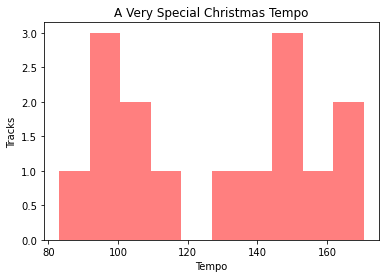

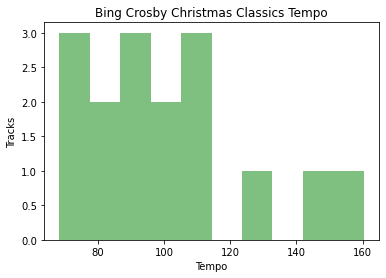

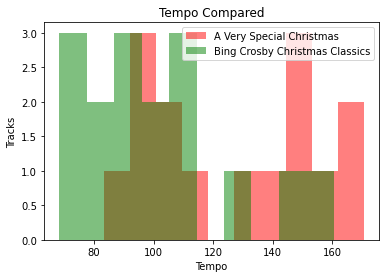

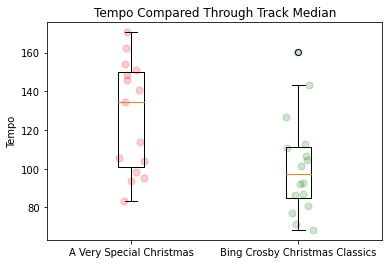

In [71]:
fig1, ax1 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['tempo']
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Tracks')
ax1.hist(rcd, alpha = 0.5, color = 'red')
ax1.set_title('A Very Special Christmas Tempo')
plt.show()

fig1, ax1 = plt.subplots()
bd = audio_features[audio_features['album'] == 'bing']['tempo']
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Tracks')
ax1.hist(bd, alpha = 0.5, color = 'green')
ax1.set_title('Bing Crosby Christmas Classics Tempo')
plt.show()

fig1, ax1 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['tempo']
bd = audio_features[audio_features['album'] == 'bing']['tempo']
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Tracks')
ax1.hist(rcd, alpha = 0.5, color = 'red', label = 'A Very Special Christmas')
ax1.hist(bd, alpha = 0.5, color = 'green', label = 'Bing Crosby Christmas Classics')
ax1.set_title('Tempo Compared')
ax1.legend()
plt.show()

fig1, ax1 = plt.subplots()
rock_val = af[af['album'] == 'rock_christmas']['tempo']
bing_val = af[af['album'] == 'bing']['tempo']
rock_x = [1] * len(rock_val)
bing_x = [2] * len(bing_val)
rock_x_jitter = np.random.uniform(-0.10, .10, len(rock_x)) 
bing_x_jitter = np.random.uniform(-0.10, .10, len(bing_x)) 
ax1.scatter(rock_x + rock_x_jitter, rock_val, alpha = 0.2, s= 50, color = 'red')
ax1.scatter(bing_x + bing_x_jitter, bing_val, alpha = 0.2, s= 50, color = 'green')
ax1.set_xlim(0.5, 2.5)
ax1.boxplot([rock_val, bing_val])
ax1.set_xticks([1,2], ['A Very Special Christmas', 'Bing Crosby Christmas Classics'])
ax1.set_ylabel('Tempo')
ax1.set_title('Tempo Compared Through Track Median')
plt.show()

<span style ="font-family:Helvetica">Next is the energy. According to the Spotify API, if a song is closer to one it has a higher energy. The Special Christmas has a wide range of energy from 0.1-0.9 while Bing's album ranges from 0.1-0.5. Of the 15 tracks from the rock album about 7 tracks are on par with all of Bing's tracks. Depending on if the listener likes higher energy Christmas songs they might like the 8 other tracks from a very special Christmas. It all depends on if the listener prefers a cozier Christmas or an upbeat Christmas.</span>

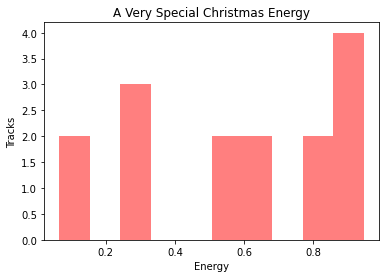

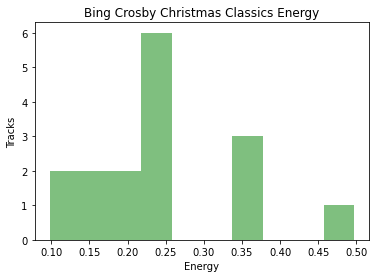

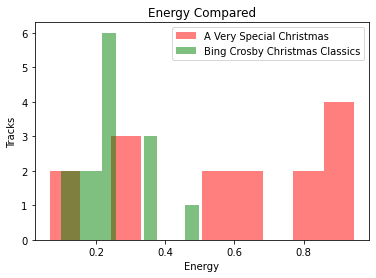

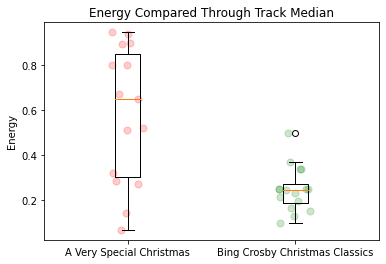

In [72]:
fig2, ax2 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['energy']
ax2.set_xlabel('Energy')
ax2.set_ylabel('Tracks')
ax2.hist(rcd, alpha = 0.5, color = 'red')
ax2.set_title('A Very Special Christmas Energy')
plt.show()

fig2, ax2 = plt.subplots()
bd = audio_features[audio_features['album'] == 'bing']['energy']
ax2.set_xlabel('Energy')
ax2.set_ylabel('Tracks')
ax2.hist(bd, alpha = 0.5, color = 'green')
ax2.set_title('Bing Crosby Christmas Classics Energy')
plt.show()

fig2, ax2 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['energy']
bd = audio_features[audio_features['album'] == 'bing']['energy']
ax2.set_xlabel('Energy')
ax2.set_ylabel('Tracks')
ax2.hist(rcd, alpha = 0.5, color = 'red', label = 'A Very Special Christmas')
ax2.hist(bd, alpha = 0.5, color = 'green', label = 'Bing Crosby Christmas Classics')
ax2.set_title('Energy Compared')
ax2.legend()
plt.show()

fig2, ax2 = plt.subplots()
rock_val = af[af['album'] == 'rock_christmas']['energy']
bing_val = af[af['album'] == 'bing']['energy']
rock_x = [1] * len(rock_val)
bing_x = [2] * len(bing_val)
rock_x_jitter = np.random.uniform(-0.10, .10, len(rock_x)) 
bing_x_jitter = np.random.uniform(-0.10, .10, len(bing_x)) 
ax2.scatter(rock_x + rock_x_jitter, rock_val, alpha = 0.2, s= 50, color = 'red')
ax2.scatter(bing_x + bing_x_jitter, bing_val, alpha = 0.2, s= 50, color = 'green')
ax2.set_xlim(0.5, 2.5)
ax2.boxplot([rock_val, bing_val])
ax2.set_xticks([1,2], ['A Very Special Christmas', 'Bing Crosby Christmas Classics'])
ax2.set_ylabel('Energy')
ax2.set_title('Energy Compared Through Track Median')
plt.show()

<span style ="font-family:Helvetica">Next is the valence. According to the Spotify API, if a song is closer to one it has a higher valence (positivity). Both albums have a wide range of valence as each album track ranges from 0.1-0.9, though Bing's album has slightly higher valence overall. So if a listener likes positiveness from either traditional Christmas songs or classic rock songs, both parties will be satisfied.</span>

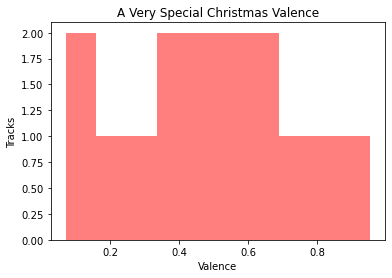

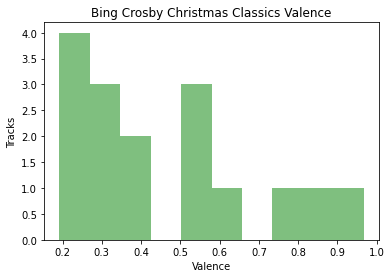

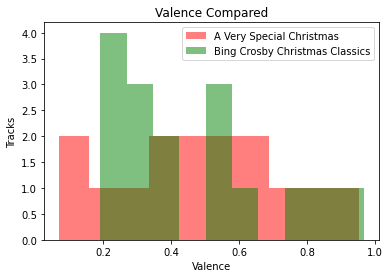

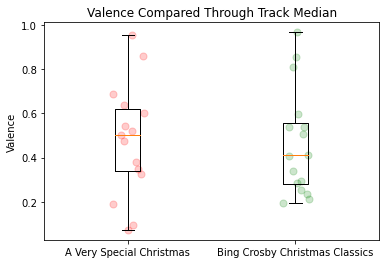

In [75]:
fig3, ax3 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['valence']
ax3.set_xlabel('Valence')
ax3.set_ylabel('Tracks')
ax3.hist(rcd, alpha = 0.5, color = 'red')
ax3.set_title('A Very Special Christmas Valence')
plt.show()

fig3, ax3 = plt.subplots()
bd = audio_features[audio_features['album'] == 'bing']['valence']
ax3.set_xlabel('Valence')
ax3.set_ylabel('Tracks')
ax3.hist(bd, alpha = 0.5, color = 'green')
ax3.set_title('Bing Crosby Christmas Classics Valence')
plt.show()

fig3, ax3 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['valence']
bd = audio_features[audio_features['album'] == 'bing']['valence']
ax3.set_xlabel('Valence')
ax3.set_ylabel('Tracks')
ax3.hist(rcd, alpha = 0.5, color = 'red', label = 'A Very Special Christmas')
ax3.hist(bd, alpha = 0.5, color = 'green', label = 'Bing Crosby Christmas Classics')
ax3.set_title('Valence Compared')
ax3.legend()
plt.show()

fig3, ax3 = plt.subplots()
rock_val = af[af['album'] == 'rock_christmas']['valence']
bing_val = af[af['album'] == 'bing']['valence']
rock_x = [1] * len(rock_val)
bing_x = [2] * len(bing_val)
rock_x_jitter = np.random.uniform(-0.10, .10, len(rock_x)) 
bing_x_jitter = np.random.uniform(-0.10, .10, len(bing_x)) 
ax3.scatter(rock_x + rock_x_jitter, rock_val, alpha = 0.2, s= 50, color = 'red')
ax3.scatter(bing_x + bing_x_jitter, bing_val, alpha = 0.2, s= 50, color = 'green')
ax3.set_xlim(0.5, 2.5)
ax3.boxplot([rock_val, bing_val])
ax3.set_xticks([1,2], ['A Very Special Christmas', 'Bing Crosby Christmas Classics'])
ax3.set_ylabel('Valence')
ax3.set_title('Valence Compared Through Track Median')
plt.show()

<span style ="font-family:Helvetica">The final category is mode. The scale is on a 0 and 1 scale (1 meaning a major key and 0 in a minor key). Most of the tracks from each album is in a major key, meaning that they had a happy tone. There were only four tracks from a Special Christmas that were in a minor key meaning that the rock album stayed true to traditional Christmas songs.</span>

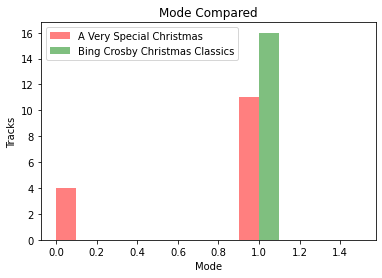

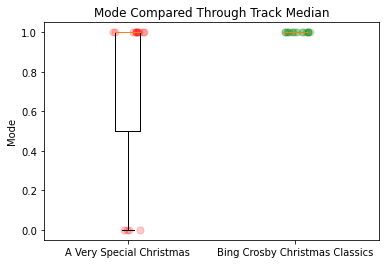

In [79]:
fig4, ax4 = plt.subplots()
rcd = audio_features[audio_features['album'] == 'rock_christmas']['mode']
bd = audio_features[audio_features['album'] == 'bing']['mode']
ax4.set_xlabel('Mode')
ax4.set_ylabel('Tracks')
ax4.hist(rcd, alpha = 0.5, color = 'red', label = 'A Very Special Christmas')
ax4.hist(bd, alpha = 0.5, color = 'green', label = 'Bing Crosby Christmas Classics')
ax4.set_title('Mode Compared')
ax4.legend()
plt.show()

fig4, ax4 = plt.subplots()
rock_val = af[af['album'] == 'rock_christmas']['mode']
bing_val = af[af['album'] == 'bing']['mode']
rock_x = [1] * len(rock_val)
bing_x = [2] * len(bing_val)
rock_x_jitter = np.random.uniform(-0.10, .10, len(rock_x)) 
bing_x_jitter = np.random.uniform(-0.10, .10, len(bing_x)) 
ax4.scatter(rock_x + rock_x_jitter, rock_val, alpha = 0.2, s= 50, color = 'red')
ax4.scatter(bing_x + bing_x_jitter, bing_val, alpha = 0.2, s= 50, color = 'green')
ax4.set_xlim(0.5, 2.5)
ax4.boxplot([rock_val, bing_val])
ax4.set_xticks([1,2], ['A Very Special Christmas', 'Bing Crosby Christmas Classics'])
ax4.set_ylabel('Mode')
ax4.set_title('Mode Compared Through Track Median')
plt.show()

### <span style ="font-family:Helvetica"><font color='red'>Conclusion</font></span>

<span style ="font-family:Helvetica">When comparing Christmas rock covers with traditional Christmas carols. While some tracks from the rock album strayed away from the traditional, the rock cover attributes remained consistent with traditional Christmas tunes. This means that whether a listener wants a bit more rock in their Christmas music, it still captures the spirit of the season. However there are many flaws in this conclusion. The first is the album choices. A Very Special Christmas had a variety of artists while the Bing album only had Crosby; its hard to compare one artist to a variety of artists, some with their own vocal style. And while these two albums remain consistent in audio attributes, what if a different rock or traditional Christmas albums were used instead and could have drastically different data sets. And finally because the data is subjective, who is to say these albums are alike? One person might listen and say that the Christmas rock album is nothing like traditional Christmas music, while another might disagree.</span>